In [2]:
"""
A simple example on how to use the CNN model to tranform all images in the h5 dataset.
"""

import tensorflow as tf
import numpy as np
import h5py
#One should set the following environment variable if keras 3 is used:
#`export TF_USE_LEGACY_KERAS=1` into console.")

#Set paths to input and output
INPUT = 'test_in.h5'

#For predictions, one can substitute custom cost function with the standard ones.
customs = {'Custom_mse_conv_func' : tf.keras.losses.mse, 'Custom_mae_conv_func' : tf.keras.losses.mae}

#Load Keras model.
model = tf.keras.models.load_model('model.h5', custom_objects = customs)
# print(model.summary())


In [13]:
#Transform testing synthetic data.
transformed_images = dict()
original_images = dict()

with h5py.File(INPUT, 'r') as h5fi:
  for dsetkey in h5fi.keys():
      print(dsetkey, h5fi[dsetkey].shape, h5fi[dsetkey].dtype)
      images = np.array(h5fi[dsetkey])
      transformed_images[dsetkey] = model.predict(images)      
      original_images[dsetkey] = images

dataA (2, 50, 50, 1) float32
1/1 [==============================] - 0s 256ms/step
dataB (2, 50, 50, 1) float32
1/1 [==============================] - 0s 237ms/step


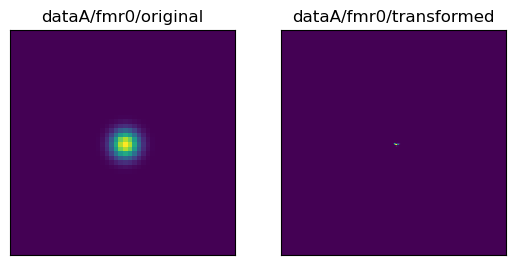

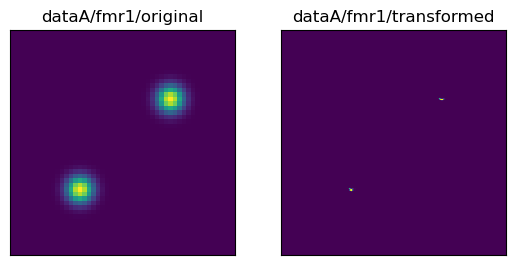

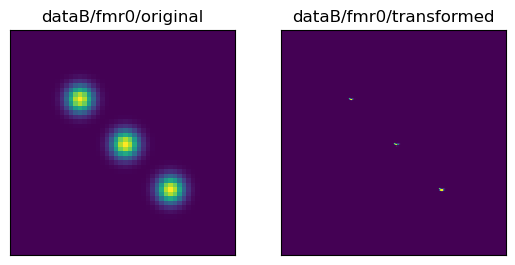

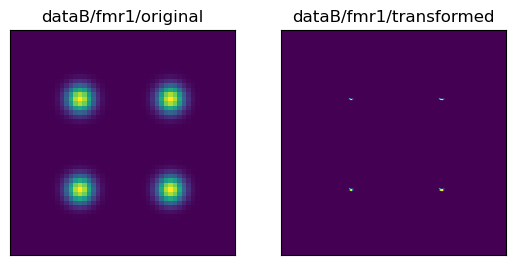

In [19]:
#Plot transformed images.
import matplotlib.pyplot as plt

for dsetkey in transformed_images:
    for i, (frame_orig, frame_cnn) in enumerate(zip(original_images[dsetkey], transformed_images[dsetkey])):
        fig, ax = plt.subplots(1, 2)
        ax[0].matshow(frame_orig[:,:,0])
        ax[1].matshow(frame_cnn[:,:,0])
        for axi, title in zip(ax, ('original', 'transformed')):
            axi.set_xticks([])
            axi.set_yticks([])
            axi.set_title(f'{dsetkey}/fmr{i}/{title}')
        plt.show()
    